# CaseText: part 2

The data in interview_len_ex_vecs.npy is a set of paragraph vector representations created with a BERT-based paragraph encoder. The data in texts.json is the paragraphs the vectors were made from. The vectors in interview_len_ex_vecs.npy are in order corresponding to the order of the paragraphs in texts.json. 

We suspect that the vector representations contain information about the length of the paragraphs they come from. This is problematic, because, ideally, we'd like the vectors to represent the meaning in the text and be agnostic to text length. 

You'll notice that the first 400 texts are just the word "court" repeated varying numbers of times. This is not a mistake--these are there intentionally and may help in your work. 


In [1]:
import numpy as np
import json
import pandas as pd

In [2]:
from numpy import linalg as LA

In [3]:
NLP_ROOT = '/home/ec2-user/SageMaker/efs/NLP/CaseText/'

## Texts

In [4]:
with open(NLP_ROOT + 'texts.json') as json_file:
    texts = json.load(json_file)

In [5]:
count = len(texts)
count

10400

In [6]:
for text in texts:
    print("text=", text)

text= court 
text= court court 
text= court court court 
text= court court court court 
text= court court court court court 
text= court court court court court court 
text= court court court court court court court 
text= court court court court court court court court 
text= court court court court court court court court court 
text= court court court court court court court court court court 
text= court court court court court court court court court court court 
text= court court court court court court court court court court court court 
text= court court court court court court court court court court court court court 
text= court court court court court court court court court court court court court court 
text= court court court court court court court court court court court court court court court 
text= court court court court court court court court court court court court court court court court 
text= court court court court court court court court court court court 

text= Cave II, Civ. A. No. 12-5366, 2013 WL 1915660, at *5 (E.D. Pa. May 9, 2013) (quoting TPP Introduction). Accord Cave I, Civ. A. No. 11-4586, 2012 WL 1957588, at *5 (E.D. Pa. May 30, 2012) ("We therefore conclude that the TPP contains a clear promise that Saxon will provide Plaintiffs with a permanent modification if several conditions precedent are met. However, it is clear that Saxon was only obligated to provide a permanent modification if Plaintiffs qualified.")
text= even if all payments are made on time and all document requests are met in a timely manner, [this] does not guarantee that a borrower will automatically receive a permanent modification. There are clear circumstances for which permanent modifications would not result. Borrowers are assured a permanent modification only if, among other things, their verbal representations can be confirmed by the documentation provided and only if circumstances do not materially change over the trial period.
text= Servicers did not 

text= “On June 7, 2003, at approximately 1:00 a.m., I parked in a gas station (convenience store) parking lot and went to sleep. This store is in Fayette, Alabama and is near a swimming pool. Sometime after 3:00 a.m. I was awaken [ed] by a white police officer. He questioned me about the vehicle I was in. After checking on the vehicle the white officer told me the vehicle had been stolen from a shop in Jasper, Alabama. He put handcuffs on my wrists and placed me in the rear of his patrol car. At this time a black police officer arrived and started asking me questions. Then the white officer transported me to the Fayette Police Department. Upon arrival at the Fayette Police Department I was fingerprinted and photographed. Prints were taken of my shoes also by the black police officer. While he was printing my shoes the white police officer asked me to tell him where I got the vehicle. He stated that if I didn't tell him I was going to spend at least two (2) to three (3) years in jail fo

text= J. Human Urinary Erythropoietin
text= 2. The non-naturally occurring EPO glycoprotein product according to claim 1 wherein said product has a higher molecular weight than human urinary EPO as measured by SDS-PAGE.
text= 4. A pharmaceutical composition comprising a therapeutically effective amount an erythropoietin glycoprotein product according to claim 1, 2, or 3.
text= The '349 patent:
text= 7. A process for producing erythropoietin comprising the step of culturing, under suitable nutrient conditions, vertebrate cells according to claim 1, 2, 3, 4, 5, or 6.
text= Erythropoiesis, the production of red blood cells, occurs continuously throughout the human life span to offset cell destruction. Erythropoiesis is a very precisely controlled physiological mechanism enabling sufficient numbers of red blood cells to be available in the blood for proper tissue oxygenation, but not so many that the cells would impede circulation. The formation of red blood cells occurs in the bone marrow

text= "Evidence of intent is admissible to prove that, if the defendant committed the act alleged, he or she did so with the intent that comprises an element of the charged offense. 'In proving intent, the act is conceded or assumed; what is sought is the state of mind that accompanied it.' [Citation.] For example, in a prosecution for shoplifting in which it was conceded or assumed that the defendant left the store without paying for certain merchandise, the defendant's uncharged similar acts of theft might be admitted to demonstrate that he or she did not inadvertently neglect to pay for the merchandise, but rather harbored the intent to steal it." (People v. Ewoldt (1994) 7 Cal.4th 380, 394 , fn. 2.) "We have long recognized 'that if a person acts similarly in similar situations, he probably harbors the same intent in each instance' [citations], and that such prior conduct may be relevant circumstantial evidence of the actor's most recent intent. The inference to be drawn is not tha

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
texts[399]

'court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court cou

In [8]:
texts[400]

'MICHELLE A. LARKIN, Judge.'

In [9]:
texts[401]

'Dismissed. (Fahey, J.).'

## Interview

In [12]:
interview = np.load(NLP_ROOT + 'interview_len_ex_vecs.npy')

In [13]:
interview[0].dtype

dtype('float32')

In [13]:
print("norm=", LA.norm(interview[5]), "vector=", interview[5])

norm= 1.0 vector= [ 4.58791712e-03  9.07664001e-03  4.47481237e-02  4.59017940e-02
  8.43003839e-02  2.11209655e-02 -4.33184169e-02 -2.50292569e-03
  1.63409784e-02  1.45626655e-02 -1.76627701e-03 -5.29444925e-02
 -1.12648439e-02 -4.47640941e-02  2.31395941e-02 -5.81642007e-03
 -2.41359398e-02  8.85570981e-03 -3.11291544e-03  2.65174285e-02
 -4.53921333e-02  1.71167850e-02  5.66798188e-02 -3.94623838e-02
 -1.56372543e-02  2.84272190e-02 -9.69763100e-03  5.29326079e-03
 -6.85958862e-02  6.09823596e-03  4.57927510e-02 -1.85490120e-02
  2.62787584e-02  4.99232486e-02 -2.61347778e-02 -4.08956259e-02
  4.80614640e-02  6.99363474e-04  2.02094521e-02  4.21928093e-02
 -8.22348222e-02 -6.84789270e-02  4.59591821e-02  2.82497965e-02
 -1.01818587e-03  1.69587992e-02 -8.81703477e-03  1.02098146e-03
  4.28023376e-02 -5.48381247e-02 -1.47038391e-02  4.92328033e-02
 -3.72509914e-03  1.61813491e-03 -1.17835235e-02 -5.62080555e-02
 -1.14969788e-02  2.10303329e-02  3.15533243e-02 -7.19480729e-03
 -2.084

In [14]:
print("norm=", LA.norm(interview[6]), "vector=", interview[6])

norm= 0.99999994 vector= [-6.86300220e-03  2.02550255e-02  4.28732261e-02  4.31933403e-02
  8.10253397e-02  2.22786255e-02 -3.99896689e-02 -1.20802131e-02
  6.32891944e-03  1.97283383e-02 -7.41262408e-03 -5.43452092e-02
 -2.04724465e-02 -4.78084423e-02  3.83509621e-02 -1.13204233e-02
 -2.65973583e-02  9.82006919e-03 -9.80494451e-03  2.50449833e-02
 -3.72921117e-02  1.94810480e-02  4.60703112e-02 -3.63591500e-02
 -1.56719126e-02  2.69607957e-02 -1.57492924e-02  4.35173279e-03
 -5.84057458e-02  1.42358933e-02  6.01647124e-02 -2.18713060e-02
  2.18151994e-02  5.00521138e-02 -3.57126966e-02 -3.34475040e-02
  4.03014794e-02 -6.61379239e-03  1.77452918e-02  5.12712710e-02
 -7.51982555e-02 -6.93969727e-02  5.65361604e-02  3.48791815e-02
  1.42511286e-04  1.72548760e-02 -1.02563147e-02 -2.29336345e-03
  4.45377640e-02 -5.45757636e-02 -9.25629959e-03  5.27215302e-02
 -3.75604403e-04 -1.14806020e-03 -2.26880442e-02 -4.22920436e-02
 -1.22805508e-02  2.03358661e-02  3.64998095e-02 -1.55305313e-02


In [15]:
num_rows = len(interview)
num_rows

10400

In [16]:
print(len(interview[0]), len(interview[1]))

768 768


In [17]:
dot_products = []

for i in range(1, num_rows):
    dot_prod_near = np.dot(interview[i-1], interview[i]) 
    dot_prod_far = np.dot(interview[5], interview[i]) 
    dot_products.append(dot_prod_near)
    print("i=", i, "norm=", LA.norm(interview[i]), "dot_prod_near=", dot_prod_near, "dot_prod_far=", dot_prod_far, "text=", texts[i] )


i= 1 norm= 1.0 dot_prod_near= 0.7478558 dot_prod_far= 0.79836464 text= court court 
i= 2 norm= 1.0 dot_prod_near= 0.92421985 dot_prod_far= 0.8483019 text= court court court 
i= 3 norm= 1.0 dot_prod_near= 0.97225696 dot_prod_far= 0.8908526 text= court court court court 
i= 4 norm= 1.0 dot_prod_near= 0.96750927 dot_prod_far= 0.9684752 text= court court court court court 
i= 5 norm= 1.0 dot_prod_near= 0.9684752 dot_prod_far= 1.0 text= court court court court court court 
i= 6 norm= 0.99999994 dot_prod_near= 0.9809327 dot_prod_far= 0.9809327 text= court court court court court court court 
i= 7 norm= 0.99999994 dot_prod_near= 0.99005926 dot_prod_far= 0.94934356 text= court court court court court court court court 
i= 8 norm= 1.0 dot_prod_near= 0.9826981 dot_prod_far= 0.89139336 text= court court court court court court court court court 
i= 9 norm= 1.0 dot_prod_near= 0.9897749 dot_prod_far= 0.8436972 text= court court court court court court court court court court 
i= 10 norm= 1.0 dot_pr

i= 208 norm= 1.0 dot_prod_near= 0.9989573 dot_prod_far= 0.40181145 text= court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court cou

i= 378 norm= 0.99999994 dot_prod_near= 0.9999999 dot_prod_far= 0.39390624 text= court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court court co

i= 555 norm= 1.0 dot_prod_near= 0.22128098 dot_prod_far= 0.1621281 text= In the context of a suction curettage, however, the physician generally does not use continuous ultrasound and hence has no way of knowing precisely whether there is continued cardiac activity. (P.I.Tr. at 36.)
i= 556 norm= 1.0 dot_prod_near= 0.45294422 dot_prod_far= 0.20945787 text= The majority claims that I would "grant an exclusive right of possession to littoral landowners . . . down to where unsubmerged land ends, which [I] locate at the water's edge. . . ." Ante at 699. A significantly more precise statement of my position is that the littoral landowner has the right of exclusive possession to unsubmerged land, while the public has the right to use submerged land under the public trust doctrine. The water's edge, i.e., where the wet sands give way to dry sands, where submerged land meets unsubmerged land, marks the limit of each of these rights.
i= 557 norm= 0.99999994 dot_prod_near= 0.45117778 dot_prod_far

i= 728 norm= 1.0000001 dot_prod_near= 0.34398043 dot_prod_far= 0.130528 text= Adams, a lawyer who owns her own law firm, was injured in a car accident when the vehicle she was driving was hit by a car driven by Michaela Bellas. Adams testified her body "jerked forward" upon impact, but her seatbelt restrained her. Her head "went forward and then it went back and hit the headrest kind of hard." At the scene of the accident, Adams did not think she was injured. She drove from the scene of the accident to the courthouse to attend a hearing. However, later in the day, she developed a headache. Several hours later, she was seen by a physician at an emergency room. The doctor noted her chief complaints were a cough and back pain, and diagnosed an upper respiratory infection and back strain. She received a prescription for pain medication.
i= 729 norm= 1.0 dot_prod_near= 0.47684112 dot_prod_far= 0.26759285 text= Plaintiff, Rhonda DeBolt ("DeBolt") has sued her former employer, Outboard Marine

i= 856 norm= 1.0 dot_prod_near= 0.29337317 dot_prod_far= 0.19224238 text= Plaintiffs allege that since July 26, 2016, Defendants have engaged with the Council on American-Islamic Relations ("CAIR"), an "Islamic advocacy organization", to develop and implement the Initiative. (Id. ¶1.) Plaintiffs allege that Defendants have entangled themselves with a religious organization and established a "discriminatory scheme that establishes Muslim students as the privileged religious group within the school community" and left students of other faiths, such as Jewish students, "vulnerable to religiously motivated bullying." (Id. ¶¶2, 47.) Plaintiffs allege that Defendants' Initiative violates: (1) the Establishment and Free Exercise Clauses of the First Amendment and the Equal Protection Clause of the Fourteenth Amendment of the U.S. Constitution, (2) the No Preference, Establishment, and No Aid Clauses of the California Constitution, and (3) various California statutes. Plaintiffs seek a declara

i= 1057 norm= 1.0 dot_prod_near= 0.30445832 dot_prod_far= 0.13411465 text= The petitioner twice misstates the language in Brecht, in an attempt to convince the court that footnote nine concerns a single instance of prosecutorial misconduct. He asserts that the Supreme Court in Brecht left open the possibility that "a deliberate and especially egregious error of prosecutorial misconduct might so infect the integrity of the proceeding as to warrant the grant of habeas relief, even if it did not substantially influence the jury's verdict." See (Reply to Resp. to Pet. for Writ of Habeas Corpus at 5), (Pet'r's Objections to Report and Recommendation at 1.) The actual direct quote refers to a "deliberate and especially egregious error of the trial type, or one that is combined with a pattern of prosecutorial misconduct" that might warrant habeas relief. 507 U.S. at 638 n. 9.
i= 1058 norm= 1.0 dot_prod_near= 0.30074352 dot_prod_far= 0.15717538 text= In Admiralty. Libel by Antonia Osipuk, an i

i= 1241 norm= 1.0 dot_prod_near= 0.20379654 dot_prod_far= 0.31174597 text= I. Generally
i= 1242 norm= 0.99999994 dot_prod_near= 0.21747024 dot_prod_far= 0.1763395 text= Id. at 1-4. The Order to Show Cause was signed on March 14, 2012, and served on April 9, 2012. Id. at 5; Doc. 62, Exhibit 7, at 1 [hereinafter the "Fraudulent Transfer Judgment"].
i= 1243 norm= 1.0 dot_prod_near= 0.490297 dot_prod_far= 0.23767886 text= Although the pleadings do not clearly establish the relationship between Goldman and Planet Stuff, at the hearing on this motion, defense counsel stated that Goldman is Planet Stuff's "principal."
i= 1244 norm= 1.0 dot_prod_near= 0.4663369 dot_prod_far= 0.17175013 text= The Defendant appealed the Fraudulent Transfer Judgment and lost. The Defendant later filed a motion to recuse the state court judge, which was denied, and the Defendant again appealed. The Florida Supreme Court dismissed this appeal.
i= 1245 norm= 1.0 dot_prod_near= 0.43473643 dot_prod_far= 0.18712844 tex

i= 1405 norm= 1.0 dot_prod_near= 0.426289 dot_prod_far= 0.17817137 text= Mayo filed suit against Defined Fitness with claims for age and national origin discrimination, and for breach of contract. On May 17, 2002, Mayo filed her First Amended Complaint for Damages, setting forth six separate counts, including a new claim for retaliation outlined in Count II.
i= 1406 norm= 0.99999994 dot_prod_near= 0.08271993 dot_prod_far= 0.088371076 text= PER CURIAM.
i= 1407 norm= 1.0000001 dot_prod_near= 0.11626621 dot_prod_far= 0.21357651 text= The party seeking to invoke a federal court's jurisdiction has the burden of establishing that such jurisdiction exists. See New Mexicans for Bill Richardson v. Gonzalez, 64 F.3d 1495, 1499 (10th Cir. 1995); Penteco Corp. v. Union Gas Sys., Inc., 929 F.2d 1519, 1521 (10th Cir. 1991).
i= 1408 norm= 0.9999999 dot_prod_near= 0.20932724 dot_prod_far= 0.09344721 text= EDWARD TOUSSAINT, JR., Judge.
i= 1409 norm= 1.0 dot_prod_near= 0.117435426 dot_prod_far= 0.226763

i= 1582 norm= 1.0 dot_prod_near= 0.76804316 dot_prod_far= 0.18797496 text= Even absent the differences between Wisconsin and Michigan law, the Diana Shooting Club standard was derived from the very different context of riparian property. Undeterred, the majority simply utilizes this standard without explanation of how it should be modified for application on the Great Lakes. The result is a definition that is doubly vague, because the majority not only fails to explain what kind of "distinct mark" is considered to be so "easily recognizable" that it can be allowed to determine the limits of the public trust, but it also fails to provide any time frame for determining how "continuous" the "presence and action of the water" must be in order to leave such a mark. The majority fails to define either of these terms in a manner that will enable the public or property owners to determine which lands are within the public trust. What kind of "distinct mark" is sufficiently "recognizable" to br

i= 1704 norm= 0.9999999 dot_prod_near= 0.3448332 dot_prod_far= 0.14105219 text= Second, assuming, arguendo, that error occurred, no prejudice resulted therefrom. Petitioner identifies no portion of the record where information regarding competency, but not pertaining to diminished capacity or insanity, was admitted. In fact, Petitioner points to no competency examination statements that were introduced into evidence despite being excludable. Consequently, it is not reasonably probable that, but for counsel's alleged error, the jury would have reached a different result at any phase of the trial. Accordingly, this argument fails.
i= 1705 norm= 0.99999994 dot_prod_near= 0.60602236 dot_prod_far= 0.1328592 text= [b]y requiring the jury to find at least one special circumstance beyond a reasonable doubt, the statute limits the death sentence to a small subclass of capital-eligible cases. The statutory list of relevant factors, applied to defendants within this subclass, "provide[s] jury gui

i= 1815 norm= 0.99999994 dot_prod_near= 0.6894911 dot_prod_far= 0.20488779 text= However, the question of whether the defendants can strengthen that warning is an entirely different one. If Dr. Jones had accurately explained the duties required by the defendants for the final liver warning rule and those required by the Tentative Final Monograph, the defendants may have a point. However, Dr. Jones does not make this distinction and instead confuses the duties imposed by the final liver warning rule with those imposed by the final monograph, which is non-existent. To allow her to offer testimony to this effect to the jury would be confusing or misleading.
i= 1816 norm= 0.99999994 dot_prod_near= 0.5018741 dot_prod_far= 0.20808783 text= e. Opinions About Whether Tylenol is GRASE
i= 1817 norm= 1.0 dot_prod_near= 0.296463 dot_prod_far= 0.19492693 text= III. CONCLUSION
i= 1818 norm= 1.0 dot_prod_near= 0.14780554 dot_prod_far= 0.18964815 text= Defendants object to the Court's authority to ent

i= 2007 norm= 1.0 dot_prod_near= 0.6935221 dot_prod_far= 0.15983507 text= Thompson argues on appeal that this instruction was erroneous because, he says, he relied on the defense of PTSD and the jury should have been informed that it “needed to first consider whether the defendant had other possible motives for behaving as he did after the crime.” (Thompson's brief, p. 98.) He cites Ex parte Weaver, 678 So.2d 284 (Ala.1996), to support his argument.
i= 2008 norm= 0.99999994 dot_prod_near= 0.76447606 dot_prod_far= 0.15779942 text= The Alabama Supreme Court in Weaver reversed Weaver's conviction because the trial court gave an erroneous flight instruction when there was no evidence of flight. In Weaver the trial court instructed the jury: “ ‘A defendant's flight to avoid prosecution may be considered by you as tending to show his consciousness of guilt.’ ” 678 So.2d at 285. The Court held that the instruction suggested that the only inference that could be drawn from the flight evidence 

i= 2200 norm= 0.9999998 dot_prod_near= 0.5258716 dot_prod_far= 0.20635301 text= The Court construes "ordering vector" to mean "one or more ordering patterns that together define the reordering of the bits of the mother code word."
i= 2201 norm= 0.99999994 dot_prod_near= 0.5788436 dot_prod_far= 0.24789363 text= Both parties rely on the arguments presented with regard to "ordering vector" to address the "without an interleaver" language. Analysis
i= 2202 norm= 1.0 dot_prod_near= 0.4487546 dot_prod_far= 0.17544115 text= As to the passage at 9:60-10:11, PanOptis contends that the claim maps to this paragraph. PanOptis contends that the claim's unique elements, including "quality of service requirements," and "as many bits as [is] needed" to obtain a "desired" or "wanted code rate," are described in the specification only within this particular passage. (Dkt. No. 102 at 6.) As to the relevant disclosure mentioning only "variable rate," PanOptis contends that the patent describes two solutio

i= 2361 norm= 0.99999994 dot_prod_near= 0.24129583 dot_prod_far= 0.19711113 text= S.F. Trial, Volume 16, testimony of Francisco Gonzales, at pp. 129-32, 138; Volume 17, testimony of Debra Espinosa, at pp. 47-49, 58-60, 63-65, 73; Volume 18, testimony of Timm Angell, at pp. 66-73.
i= 2362 norm= 1.0 dot_prod_near= 0.7379336 dot_prod_far= 0.15122467 text= S.F. Trial, Volume 21, testimony of Laura Lynn Ramirez, at pp. 33-39.
i= 2363 norm= 1.0 dot_prod_near= 0.7283069 dot_prod_far= 0.15353899 text= S.F. Trial, Volume 21, testimony of Priscilla Anne Castillo, at pp. 81-100. Mrs. Castillo also identified a photograph showing Petitioner wearing a bullet proof vest and brandishing a handgun while her young son sat next to Petitioner (State Exhibit no. 176). Id., at p. 92.
i= 2364 norm= 1.0 dot_prod_near= 0.6703248 dot_prod_far= 0.15753669 text= S.F. Trial, Volume 21, testimony of Francisco Gonzales, at pp. 149-61.
i= 2365 norm= 1.0 dot_prod_near= 0.42060953 dot_prod_far= 0.13363859 text= On Sep

i= 2475 norm= 1.0 dot_prod_near= 0.63022393 dot_prod_far= 0.14527822 text= Again, because it is the Trustee's ultimate burden to show that Debtor failed to account for the funds, and it appears the funds were more likely than not spent in the manner Debtor claims, there is no unexplained disappearance or shortage of assets. Accordingly, discharge will not be denied on the § 727(a)(5) claim. 5. The Trustee has failed to show that she is entitled to turnover of property pursuant to § 542.
i= 2476 norm= 1.0 dot_prod_near= 0.4602393 dot_prod_far= 0.17712086 text= See Adv. No. 10-7007, Pretrial Order, Doc. 44 at p. 9.
i= 2477 norm= 0.99999994 dot_prod_near= 0.44776314 dot_prod_far= 0.18694244 text= The Court also finds that Debtor Asif should be denied a general discharge pursuant to § 727(a)(3) for failure to keep or preserve proper financial records and pursuant to § 727(a)(4)(A) for knowingly and fraudulently making a false oath or account in connection with his bankruptcy case.
i= 2478 

i= 2629 norm= 1.0 dot_prod_near= 0.42286372 dot_prod_far= 0.18467472 text= Between Mr. Dawson's lies, conflicting testimony, and uncooperative behavior during every consultative examination, the ALJ had ample reason to find him not credible. Ignoring these reasons and the caselaw applicable to them, Mr. Dawson complains that the ALJ improperly rejected his description of his daily activities because they could not be objectively verified and the medical evidence of limitations was weak. (Plaintiff's Memorandum, at 18). But, given the rest of the ALJ's credibility assessment, this is no more than nitpicking. See Burnam v. Colvin, 525 Fed.Appx. 461, 464 (7th Cir. 2013); Castile v. Astrue, 617 F.3d 923, 929 (7th Cir.2010); Shramek v. Apfel, 226 F.3d 809, 811 (7th Cir.2000). The ALJ's credibility assessment need not be perfect; it just can't be patently wrong. Schreiber v. Colvin, 519 Fed.Appx. 951, 961 (7th Cir. 2013)("We agree that the ALJ's discussion regarding [claimant's] activities o

i= 2807 norm= 1.0 dot_prod_near= 0.84771687 dot_prod_far= 0.136078 text= "Evidence is material only if there is a reasonable probability that, had the evidence been disclosed to the defense, the result of the proceeding would have been different." United States v. Allen, 603 F.3d 1202, 1216 (10th Cir. 2010) (citing Velarde, 485 F.3d at 558-59) (10th Cir. 2010). "A reasonable probability is a probability sufficient to undermine confidence in the outcome."Id. Thus, "[t]o be material under Brady, undisclosed information or evidence acquired through that information must be admissible." Banks v. Reynolds, 54 F.3d 1508, 1521 n. 34 (10th Cir. 1995). "Impeachment evidence is considered exculpatory for Brady purposes." Torres, 569 F.3d at 1282. On a motion for new trial, it is not the role of the Court to reweigh evidence, assess witness credibility, or decide whether the newly discovered information establishes a defendant's guilt or innocence beyond a reasonable doubt. Banks, 54 F.3d at 1521

i= 2975 norm= 1.0 dot_prod_near= 0.32347953 dot_prod_far= 0.2539665 text= Count 1 of the First Amended Complaint asserted federal constitutional tort claims under 42 U.S.C. § 1983 against all the defendants. Count 2 asserted Indiana common law tort claims against the Sheriff of Marion County and Indiana constitutional tort and statutory claims against all the defendants.
i= 2976 norm= 1.0 dot_prod_near= 0.5614716 dot_prod_far= 0.16904223 text= In some of their allegations, the plaintiffs did not identify the specific deputy or deputies who were the actors. However, we did not find this deficiency to be fatal to those claims. The Court of Appeals for the Ninth Circuit so held in a similar case:
i= 2977 norm= 0.99999994 dot_prod_near= 0.27256373 dot_prod_far= 0.17837563 text= We concluded that, when lawfully executing a search warrant on premises believed to house a narcotics distribution operation, it is a reasonable use of force for law enforcement officers to secure the premises and p

i= 3157 norm= 0.9999999 dot_prod_near= 0.73114586 dot_prod_far= 0.21139362 text= Kronich, 160 Wn.2d at 903 (quoting Kirkpatrick, 160 Wn.2d at 887.
i= 3158 norm= 0.99999994 dot_prod_near= 0.46780846 dot_prod_far= 0.22058633 text= The reasoning in Kronich and Kirkpatrick applies equally here. Like the certified documents in those cases, the certified copy of J.G.'s learner's permit is a public record containing no accusatory statements, testimony, or opinions. It contains only verifiable facts adduced by a government official in the regular course of his or her duties.
i= 3159 norm= 1.0 dot_prod_near= 0.3404665 dot_prod_far= 0.16593306 text= 5d. Is the inmate unable to control behavior?
i= 3160 norm= 1.0 dot_prod_near= 0.39432317 dot_prod_far= 0.20832056 text= Because Montgomery reported that he was using methadone and heroin before arrest (id. at 6-7), a detoxification protocol was initiated shortly after intake. Id. at 72-73. According to a "Detoxification Referrals Flow Sheet" for Mon

i= 3311 norm= 1.0000001 dot_prod_near= 0.22399768 dot_prod_far= 0.15350501 text= Earlier in this litigation, Judge Zainey exhaustively addressed the very similar, if not identical, unfair competition claims based on the false-advertising at issue in the original cases. Plaintiffs may proceed on two theories to recover damages for these false-advertising claims: (1) plaintiff may demonstrate that the advertisement or promotion is literally false; or (2) plaintiff may demonstrate that the advertisement or promotion is likely to deceive customers. If the plaintiff establishes that an advertisement or promotion is literally false, then a court may assume that it actually misled customers. But, if the advertisement or promotion is only shown to be misleading or ambiguous, the plaintiff will have to demonstrate actual deception and materiality —essential elements of an unfair competition claim for false-advertising.
i= 3312 norm= 0.9999999 dot_prod_near= 0.55037284 dot_prod_far= 0.17294699 t

i= 3444 norm= 1.0 dot_prod_near= 0.32141247 dot_prod_far= 0.16668886 text= In Matter of X-K-, the Board of Immigration Appeals ("Board") held that only some aliens transferred after establishing a credible fear are subject to mandatory detention. 23 I&N Dec. 731, 736 (BIA 2005). Specifically, the Board concluded that "arriving" aliens—such as those "attempting to come into the United States at a port-of-entry," see 8 C.F.R. § 1001.1(q)—must be detained, but all other transferred aliens are eligible for bond. 23 I&N Dec. at 736.
i= 3445 norm= 0.99999994 dot_prod_near= 0.68324697 dot_prod_far= 0.20708886 text= Although the Act refers to the "Attorney General," Congress has since authorized the Secretary to exercise that power. See 6 U.S.C. § 202(3); 8 C.F.R. § 235.3(b)(1)(ii) (2002).
i= 3446 norm= 1.0000001 dot_prod_near= 0.5136062 dot_prod_far= 0.16326535 text= The respondent here is a citizen of India. He traveled to Mexico and crossed illegally into the United States. He was apprehend

i= 3566 norm= 1.0 dot_prod_near= 0.46622467 dot_prod_far= 0.17644675 text= "In case an executory contract or unexpired lease of property shall be rejected . . ., any person injured by such nonadoption or rejection, shall, for all purposes of this section be deemed to be a creditor to the extent of such damage or injury, provided, that the judge shall consider the circumstances of an assignment of future rent claims and the amount of consideration paid for such assignment in determining the amount of damages allowed an assignee hereunder and may limit such damages to the actual consideration paid for such claims." Id. pp. 231-2.
i= 3567 norm= 1.0 dot_prod_near= 0.27824602 dot_prod_far= 0.20122714 text= Comment of Coordinator, Id. p. 100 et seq.
i= 3568 norm= 1.0 dot_prod_near= 0.1921263 dot_prod_far= 0.1953054 text= The statute provides in relevant part:
i= 3569 norm= 0.99999994 dot_prod_near= 0.111978576 dot_prod_far= 0.16382691 text= Counsel moved for a variant sentence of between 120

i= 3757 norm= 0.9999999 dot_prod_near= 0.56092054 dot_prod_far= 0.24660054 text= .1 for all new ships to which the requirements of the 1974 SOLAS Convention, as amended, apply, the pilot card should be provided; .2 for all new ships of 100 metres in length and over, and all new chemical tankers and gas carriers regardless of size, the pilot card, wheelhouse poster and [maneuvering] booklet should be provided.
i= 3758 norm= 1.0 dot_prod_near= 0.7533568 dot_prod_far= 0.23983063 text= Third, CARCO alleges a violation of IMO Resolution A.893(21) for failing to prepare a voyage plan. IMO Resolution A.893(21)(3.1) provides in relevant part, "On the basis of the fullest possible appraisal, a detailed voyage or passage plan should be prepared which should cover the entire voyage or passage from berth to berth, including those areas where the services of a pilot will be used." The Resolution also provides factors which should be included in the voyage or passage plan, including but not limited 

i= 3946 norm= 1.0 dot_prod_near= 0.2569005 dot_prod_far= 0.16260977 text= "THE COURT: ... First of all, in regards to where the alternate is sitting, ... I just want to make sure that the alternate cannot see that your client is restrained to the table. Have you been able to view that?
i= 3947 norm= 1.0 dot_prod_near= 0.4282636 dot_prod_far= 0.21685517 text= Exxon attempts to defeat this claim by arguing that a public nuisance in Maryland is a criminal offense, and noting that plaintiffs reference no law that criminalizes Exxon's alleged conduct. Plaintiffs respond that under Maryland law criminal conduct is not a required element of a public nuisance; but even assuming it is, plaintiffs have alleged that MTBE contamination is "proscribed by state and federal law."
i= 3948 norm= 1.0 dot_prod_near= 0.37563074 dot_prod_far= 0.17742856 text= "THE COURT: Well, I'm not sure that anyone from the audience could see.
i= 3949 norm= 1.0 dot_prod_near= 0.35201502 dot_prod_far= 0.17183045 text= Se

i= 4060 norm= 1.0 dot_prod_near= 0.68981606 dot_prod_far= 0.18891937 text= Q: Sir, there was broad daylight on August 16th. I mean, was it sunny out?
i= 4061 norm= 1.0 dot_prod_near= 0.36381575 dot_prod_far= 0.29568666 text= {¶62} "A TTC zone is an area of a highway where road user conditions are changed because of a work zone or an incident through the use of TTC devices, uniformed law enforcement officers, or other authorized personnel." OMUTCD, Section 6C.02. A work zone is a particular type of TTC zone and defined as follows:
i= 4062 norm= 0.99999994 dot_prod_near= 0.4444767 dot_prod_far= 0.21734945 text= {¶64} The manual provides five categories of work duration, each with specified, required, and recommended safety requirements. Work zones of "short duration," require work that occupies up to one hour. Id. Loading the chip spreader took approximately five minutes, and therefore, falls under the short-duration work category. (Porter Depo. at 65, 70); (Borns Depo. at 26). Once the 

i= 4206 norm= 1.0 dot_prod_near= 0.7330853 dot_prod_far= 0.2732662 text= {¶29} In the instant case, the trial court's judgment entry is summary and states only that the motion to dismiss is well-taken and therefore granted, but the trial court's reasoning process may be ascertained from the record of the dismissal hearing. The trial court noted that the complainant was the same in the both the criminal case and the Family Court case—the state of Ohio—and that the evidence was the same. The trial court concluded the criminal action was a collateral attack on the Family Court proceeding.
i= 4207 norm= 1.0 dot_prod_near= 0.5248761 dot_prod_far= 0.18589494 text= On November 4, 2011, the trial court revoked probation and executed the previously imposed five-year sentence. The trial court concluded that defendant was not entitled to commitment to county jail under the Realignment Act, and it ordered defendant to serve his five-year sentence in prison.
i= 4208 norm= 1.0 dot_prod_near= 0.24899

i= 4374 norm= 1.0 dot_prod_near= 0.51377565 dot_prod_far= 0.20388837 text= Maryland Rule 2-503(a)(1) provides: "When actions involve a common question of law or fact or a common subject matter, the court, on motion or on its own initiative, may order a joint hearing or trial or consolidation of any or all of the claims, issues, or actions." Any such consolidation, of course, must comport with due process principles. See U.S. Const. amend. XIV, § 1.
i= 4375 norm= 0.9999999 dot_prod_near= 0.2895685 dot_prod_far= 0.15405765 text= Id. at 344-45, 667 A.2d 116 (footnotes omitted).
i= 4376 norm= 1.0 dot_prod_near= 0.31798083 dot_prod_far= 0.2237486 text= In Abate II, Phase I involved: the common issues as to all of the defendants named by the trial plaintiffs and common issue plaintiffs; cross-claims and third-party claims against any of the Phase I defendants who did not settle with the plaintiffs prior to or during trial; and all remaining issues regarding the trial plaintiffs. Phase II inv

i= 4502 norm= 1.0 dot_prod_near= 0.46237624 dot_prod_far= 0.2141655 text= In his declaration, Tracy Drummond, a Senior Enterprise Architect at Visa and Yao's direct supervisor, chronicles the instances in which he was informed of other employees having difficulty understanding Yao, Yao's attendance problems, Yao's failure to attend mandatory training, and Yao's general insubordination. Drummond Decl. at ¶ 20-28, 36, 37, 40, 45-48, 68. Further, the declaration of Karla Goldman, the Senior Business Leader of the Process Management team at Visa, attests to having told Mr. Drummond that she had difficulty understanding Yao when he spoke, that she had been informed by others in the workplace of similar difficulties, that Yao exhibited "performance issues" on the job, and that Yao rejected the suggested performance improvement plan. Goldman Decl. at ¶ 8-16. Lastly, the declaration of Jim Torrise, a Senior Project Manager for Visa, states that there were "qualitative issues" with Yao's coding

i= 4675 norm= 1.0 dot_prod_near= 0.29524004 dot_prod_far= 0.25498712 text= On June 3, 2005, the General Assembly passed H.545, the "Dry Cask Storage Authorization [Act] of 2005." (Thayer, Tr. 109; PX 22; PX 32 at 00017.) This Act, which was signed into law on June 21, 2005, required owners of the VYNPS to obtain a Certificate of Public Good in accordance with Section 248 before constructing or altering a spent nuclear fuel facility. (PX 32 at 00019; see also Thayer, Tr. 91, 102-03, 106.) In addition, the Act required the Public Service Board to find that ENVY was "in substantial compliance with any memorandum of understanding entered into between the state and [ENVY]." (PX 32 at 00019.) That MOU (discussed below) had been developed by the Department of Public Service and ENVY beforehand, and was essentially drafted and in final form by early June 2005. (Thayer, Tr. 111.) Satisfaction of the Act and the referenced MOU would constitute "compliance with the provisions of this chapter that

i= 4856 norm= 1.0 dot_prod_near= 0.38360816 dot_prod_far= 0.2307981 text= The Volks' notice of motion identifies Federal Rule of Civil Procedure 12(b)(1), (6), and (7), Rule F(1) and (7) of the Supplemental Rules for Admiralty or Maritime Claims and Asset Forfeiture Actions, and 46 U.S.C. §§ 186, 3505(b) (presumably the Volks intended to cite § 30505(b)), 30505(a), and 30511(a) as the bases upon which they seek relief. (Dkt. No. 16 at 1–2.) As clarified in their reply, the Volks specify that their “motion is one to dismiss under Rule 12(b)(1) and 12(b)(6).” (Dkt. No. 20 at 1.) Moreover, the Volks explain that, despite Buchanan's suggestion, (Dkt. No. 19 at 1, 1 n. 2, 5), their motion “is not a summary judgment motion per se,” and that “[i]t is the [c]ourt's prerogative under the Federal Rules to convert the motion to one under Rule 56,” (Dkt. No. 20 at 4–5). The court excludes from its consideration the matters outside the pleadings presented by the Volks in support of their motion to 

i= 5041 norm= 1.0 dot_prod_near= 0.20710309 dot_prod_far= 0.15302554 text= The critical issue in this case is not whether Ms. Michel suffered a seizure but at what point in time she suffered the seizure. While it appears that this case exemplifies the classic battle of the experts, under the Federal Rules of Evidence, an expert's opinion must have some basis grounded in fact and must be supported by reliable scientific methods. Fed.R.Evid. 702; See Daubert v. Merrell Dow Pharmaceuticals, Inc., 509 U.S. 579, 590 (1993). Furthermore, under Daubert, the district court must exclude expert testimony that is no more than "subjective belief or unsupported speculation." Id. Additionally, as the Tenth Circuit stated, "[i]t is axiomatic that an expert, no matter how good his credentials, is not permitted to speculate." Gobel v. Denver and Rio Grande Western Railroad Company, 215 F.3d 1083, 1088 (10th Cir. 2000).
i= 5042 norm= 1.0 dot_prod_near= 0.25758138 dot_prod_far= 0.19701092 text= Pending b

i= 5206 norm= 1.0 dot_prod_near= 0.53253216 dot_prod_far= 0.26771522 text= 386. The WASP for the natural gas was based on the arm's length sales at the pipeline, and not on any preceding affiliate transaction. See Tr. at 108:6-109:13 (Reineke, Brickell); Mathis Depo. at 40:24-41:14 (Brickell, Mathis).
i= 5207 norm= 0.9999999 dot_prod_near= 0.6261876 dot_prod_far= 0.26650074 text= 388. The Defendants use the OPIS Mt. Belvieu index price -- an oil index -- for well condensate. See Stipulation ¶ 11, at 3.
i= 5208 norm= 1.0 dot_prod_near= 0.61526144 dot_prod_far= 0.30401552 text= 410. Various persons from Bank of America, SWMF Properties, and Moncrief Trust called WPX Rocky Mountain seeking information, including with respect to adjustments to royalty payments, and the information contained in the check detail. See, e.g., Tr. at 729:24-730:16 (Mathis, Sutphin); Customer Service Hotline Inter Office Call Sheet (Defendants' Ex. 80).
i= 5209 norm= 1.0 dot_prod_near= 0.6191594 dot_prod_far= 0.

i= 5377 norm= 1.0 dot_prod_near= 0.38002843 dot_prod_far= 0.23251677 text= (2) a fiduciary from purchasing insurance to cover liability under this part from and for his own account; or
i= 5378 norm= 0.99999994 dot_prod_near= 0.6643722 dot_prod_far= 0.17378443 text= In addition to any liability which he may have under any other provisions of this part, a fiduciary with respect to a plan shall be liable for a breach of fiduciary responsibility of another fiduciary with respect to the same plan in the following circumstances:
i= 5379 norm= 1.0 dot_prod_near= 0.36847767 dot_prod_far= 0.1397105 text= In July 2002, CHRISTUS removed the action to the Middle District of Louisiana, asserting subject matter jurisdiction under 28 U.S.C. § 1334(b). CHRISTUS argued that appellees' suit was related to the Summit bankruptcy action already pending in the Eastern District. In August 2002, CHRISTUS also filed in the bankruptcy court proofs of claim against Summit on behalf of appellees asserting Summit'

i= 5523 norm= 1.0 dot_prod_near= 0.5174514 dot_prod_far= 0.19650349 text= Consumers spend an average of 13 seconds making an in-store purchasing decision. The decision is heavily dependent on a product's packaging, in particular, the package dimensions. When faced with a large box and a smaller box, both containing the same amount of product, a consumer is more likely to choose the larger one, thinking it is a better value.
i= 5524 norm= 1.0 dot_prod_near= 0.21138182 dot_prod_far= 0.18034652 text= To survive a Rule 12(b)(6) motion to dismiss, a complaint must contain "enough facts to state a claim to relief that is plausible on its face." Ashcroft v. Iqbal, 556 U.S. 662, 678, (2009) (quoting Bell Atl. Corp. v. Twombly, 550 U.S. 544, 570 (2007)). A complaint is plausible if its "factual content allows the court to draw the reasonable inference that the defendant is liable for the misconduct alleged." Braden v. Wal-Mart Stores, Inc., 588 F.3d 585, 594 (8th Cir. 2009) (quoting Iqbal, 556 

i= 5706 norm= 1.0 dot_prod_near= 0.3033026 dot_prod_far= 0.22671518 text= Among other reasons for viewing Vaniman's 1979 balance sheet as overstating assets is that the balance sheet credits Vaniman with cash of $8,442.20, although this was simply a temporary circumstance (505).
i= 5707 norm= 1.0 dot_prod_near= 0.36066532 dot_prod_far= 0.20194992 text= [ FDA's Drug Approval Process: Up to the Challenge?: Hearing Before the S. Comm. on Health, Educ. Labor and Pensions, 109th Cong. 10, 26-27 (2005) (hereafter, Up to the Challenge)].
i= 5708 norm= 1.0 dot_prod_near= 0.367438 dot_prod_far= 0.20151708 text= 67. To find money with which to pay James Martin and Pirrone, Jack Martin endeavored to interest various potential investors (708-12). The group with which Margaret Janaskie was associated ultimately gave Jack Martin approximately $66,000 between November, 1979 and April, 1980, all of which went into the corporate checking account (709-12, 723). Out of the monies which Jack Martin receiv

i= 5849 norm= 1.0 dot_prod_near= 0.5720798 dot_prod_far= 0.26310545 text= In his Response, M. Malone asks the Court to find undisputed that the SRT or assisting patrol units did not establish inner and outer perimeters in this case, as the SRT Operations Manual requires. See Response ¶ 19, at 8. In support of this factual assertion M. Malone cites only to the SRT Operations Manual. See Response ¶ 19, at 8. The Court agrees that the SRT Operations Manual requires the SRT or assisting patrol units to establish inner and outer perimeters. See SRT Operations Manual at 2-3. M. Malone does not, however, cite to or attach any evidence in support of its factual assertion that the SRT or assisting patrol units in this case did not establish inner and outer perimeters in this case. Accordingly, the Court cannot find this proposed factual assertion undisputed.
i= 5850 norm= 0.9999999 dot_prod_near= 0.45858413 dot_prod_far= 0.2024644 text= With respect to these factual assertions, M. Malone states

i= 6006 norm= 0.99999994 dot_prod_near= 0.30267155 dot_prod_far= 0.2442496 text= Conduct is actionable under CUTPA if it either "1) offends public policy, 2) is immoral, unethical, oppressive, or unscrupulous, or 3) causes substantial injury to consumers, competitors or other business[men]." Johnson Electric Co., Inc. v. Salce Contracting Assoc., Inc. 72 Conn. App. 342, 356 (Conn.App. Ct. 2002); Scotland Yard Assoc. v. Manufacturer/Traders, 1999 Conn. Super. Lexis 1708 (Conn.Super.Ct. 1999). The misconduct must demonstrate unfairness to a substantial degree.See Id.
i= 6007 norm= 0.99999994 dot_prod_near= 0.37601644 dot_prod_far= 0.1506402 text= Even taking these facts in the light most favorable to Plaintiff, the non-moving party, they are insufficient to raise a question of material fact. Even if Defendant did not follow Plaintiff's credit policy and took credits without returning the products, Plaintiff has failed to provide any evidence supporting element two of an intentional misre

i= 6193 norm= 1.0 dot_prod_near= 0.7841307 dot_prod_far= 0.15112132 text= Strope, 2010 WL 1257917, at *6 (quoting Williams v. Aetna Life Ins. Co., 509 F.3d 317, 323 (7th Cir. 2007)). Accord Boardman v. Prudential Ins. Co. of Am., 337 F.3d 9, 16 n. 5 (1st Cir. 2003) ("While the diagnoses of chronic fatigue syndrome and fibromyalgia may not lend themselves to objective clinical findings, the physical limitations imposed by the symptoms of such illnesses do lend themselves to objective analysis."); Cook v. N.Y. Times Co. Long-Term Disability Plan, No. 02 Civ. 9154, 2004 WL 203111, at *4 (S.D.N.Y. Jan. 30, 2004) ("It is . . . reasonable to insist on some objective measure of claimants' capacity to work, so long as that measure is appropriate as applied to each specific condition.").
i= 6194 norm= 1.0 dot_prod_near= 0.3150327 dot_prod_far= 0.07364878 text= Id. (quoting Firestone, 489 U.S. at 113).
i= 6195 norm= 1.0 dot_prod_near= 0.34676152 dot_prod_far= 0.21973471 text= To the extent Torto

i= 6345 norm= 0.9999999 dot_prod_near= 0.37623128 dot_prod_far= 0.1989554 text= Of course, officials cannot extract a confession "by any sort of threats or violence, nor . . . by any direct or implied promises, however slight, nor by the exertion of any improper influence." Hutto, 429 U.S. at 30 (quotingBram v. United States, 168 U.S. 532, 542-43 (1897)). Neither physical intimidation nor psychological pressure is permissible.Haswood, 350 F.3d at 1027; United States v. Tingle, 658 F.2d 1332, 1335 (9th Cir. 1981). False promises or threats may also render a confession invalid. Miranda, 384 U.S. at 476, 86 S.Ct. 1062("any evidence that the accused was threatened, tricked, or cajoled into a waiver (of Fifth Amendment right to remain silent) will, of course, show that the defendant did not voluntarily waive his privilege");Henry, 197 F.3d at 1024 (confession was coerced where interrogating officers falsely told accused that what he said could not be used against him). But cf. United States

i= 6474 norm= 1.0 dot_prod_near= 0.6693779 dot_prod_far= 0.19693826 text= Appellant further argues that the trial court violated her Sixth Amendment right to confrontation by admitting the transcript. Because this Court has previously held that DMV transcripts are nontestimonial in nature and that holding is binding on this panel through the interpanel accord doctrine, appellant's argument must fail.
i= 6475 norm= 1.0 dot_prod_near= 0.50914145 dot_prod_far= 0.21652235 text= This action does not involve claims relating to the Andover fund. Claims against Danziger, Markhoff, and others based on investments in the Andover fund are asserted in an action pending in New York State Supreme Court, Hecht v. Andover Associates, No. 6110/09. See supra note 3.
i= 6476 norm= 1.0000001 dot_prod_near= 0.35772634 dot_prod_far= 0.18559739 text= In 1997, Ivy became suspicious that the number of Standard Poor's 100 Index options ("OEX options") traded on a given day at the Chicago Board of Options ("CBOE

i= 6656 norm= 0.99999994 dot_prod_near= 0.64505464 dot_prod_far= 0.14277641 text= The official-capacity § 1983 retaliation claim against Keen, however, is not covered by official immunity. See Allen v. Coughlin, 64 F.3d 77, 81 (2d Cir.1995). Thus, despite lower courts' disagreement on this issue, following Hicks, the Court concludes that plaintiff's retaliation claim is cognizable under an equal protection theory. See Hicks, 593 F.3d at 171 (“The premise of this lawsuit is that plaintiffs were treated differently—that is, they suffered retaliation—on the basis of their participation in discrimination investigations and proceedings. That participation obviously constitutes an ‘impermissible’ reason to treat an employee differently.”).
i= 6657 norm= 1.0 dot_prod_near= 0.6865439 dot_prod_far= 0.20617795 text= Plaintiff presents four varieties of individual-capacity claims under the NYHRL: he alleges that defendants violated the NYHRL both through disparate treatment and retaliation, and t

i= 6779 norm= 1.0 dot_prod_near= 0.6110476 dot_prod_far= 0.17570645 text= "(1) a material misrepresentation or omission by the defendant; (2) scienter; (3) a connection between the misrepresentation or omission and the purchase or sale of a security; (4) reliance upon the misrepresentation or omission; (5) economic loss; and (6) loss causation."
i= 6780 norm= 1.0 dot_prod_near= 0.44414327 dot_prod_far= 0.15306118 text= Rule 9(b) provides that "[i]n alleging fraud or mistake, a party must state with particularity the circumstances constituting fraud or mistake. Malice, intent, knowledge, and other conditions of a person's mind may be alleged generally." Fed. R. Civ. P. 9(b). Plaintiffs must plead the elements of their Rule 10b-5 claims with particularity. See Goldstein v. MCI WorldCom, 340 F.3d 238, 245 (5th Cir. 2003) (citing Williams v. WMX Technologies, Inc., 112 F.3d 175, 177 (5th Cir.), cert. denied, 118 S. Ct. 412 (1997)). Particularity is required so that the complaint provides d

i= 6951 norm= 0.9999998 dot_prod_near= 0.63039994 dot_prod_far= 0.21217874 text= Because the court finds that summary judgment is appropriate as to Fuel's SCUTPA claim based on its finding that no reasonable trier of fact could find likelihood of forward or reverse confusion among relevant consumers, the court need not address the parties' arguments with respect to the public interest prong of SCUTPA.
i= 6952 norm= 0.99999994 dot_prod_near= 0.43264836 dot_prod_far= 0.149623 text= Pursuant to the court's finding that no reasonable trier of fact could find likelihood of forward or reverse confusion among relevant consumers, the only remaining claim is Fuel's fourth cause of action for federal trademark dilution. The Federal Trademark Dilution Act (“FTDA”) provides that “the owner of a famous mark that is distinctive, inherently or through acquired distinctiveness, shall be entitled to an injunction against another person who, at any time after the owner's mark has become famous, commence

i= 7113 norm= 0.99999994 dot_prod_near= 0.46131688 dot_prod_far= 0.2441678 text= The doctrine, albeit expansive, is not without its limits. InFigueroa, the court outlined judicial immunity and its two exceptions as:
i= 7114 norm= 0.99999994 dot_prod_near= 0.41744217 dot_prod_far= 0.21331516 text= The "absence of jurisdiction" inquiry focuses on jurisdiction over subject matter, rather than over the person or geography: "`where a court has some subject matter jurisdiction, there is sufficient jurisdiction for immunity purposes.'" Figueroa v. Blackburn, 208 F.3d 435, 444 (3d Cir. 2000) (citing Winchell, 105 F.3d at 1122). As a result, "when . . . a court with subject matter jurisdiction acts where . . . personal jurisdiction is lacking, judicial . . . absolute immunity remain[s] intact." Stern v. Mascio, 262 F.3d 600, 607 (6th Cir. 2001). The operative inquiry is "whether at the time [the judge] took the challenged action he had jurisdiction over the subject matter before him." Stump, 43

i= 7228 norm= 0.99999994 dot_prod_near= 0.3305639 dot_prod_far= 0.30349094 text= 1. FDA Actions
i= 7229 norm= 1.0 dot_prod_near= 0.28660655 dot_prod_far= 0.17501685 text= The FDA's primary concern was the possible viral contamination of the HNK cells. Microbix and Gensia attempted to put together a plan to remedy the quality control issues bearing on contamination. Pl's Ex. 69 at GS30705. Microbix alleges that the FDA's concerns "could be easily handled provided that the cell supplier cooperates." Id. However, there is no evidence that either Microbix or Gensia approached BioWhittaker to request cooperation in addressing FDA concerns, or that BioWhittaker refused to cooperate.
i= 7230 norm= 1.0 dot_prod_near= 0.80891967 dot_prod_far= 0.158739 text= By April of 1998, Microbix had completed the experimental phase of the urokinase project and was ready to begin commercial manufacturing. As the next step, Microbix planned to enter into a contract with Creative BioMolecules ("CBM"), a manuf

i= 7401 norm= 1.0 dot_prod_near= 0.5281949 dot_prod_far= 0.19998881 text= (i) Loss of support, costs of estate planning, and funeral expenses; and
i= 7402 norm= 0.9999999 dot_prod_near= 0.37766615 dot_prod_far= 0.17309383 text= 22. The vessels owned and/or operated by Shipowner Defendants were unseaworthy under the General Admiralty and Maritime Law in that their vessels presented an unreasonably unsafe working environment, whereby the shipowner Defendants substantially breached the implied warranty of providing a reasonably safe vessel and working conditions, which was to be reasonably fit for the purpose for which it was intended.
i= 7403 norm= 0.99999994 dot_prod_near= 0.33106798 dot_prod_far= 0.27512473 text= (h) Death by wrongful acts;
i= 7404 norm= 1.0 dot_prod_near= 0.27220723 dot_prod_far= 0.20188104 text= WHEREFORE, Plaintiffs demand trial by jury and judgment against Defendants, jointly and severally, in an amount exceeding the threshold jurisdictional requirement or otherwis

i= 7555 norm= 0.99999994 dot_prod_near= 0.6486348 dot_prod_far= 0.18560031 text= At the hearing, Newell presented testimony from lead counsel Bruce Peterson and second chair Tim Agan. Peterson testified he took the case over from another attorney early in the proceedings. (RT 3/3/11 at 9-10.) Prior counsel had retained a mitigation specialist and one expert, Dr. Wicks, but not much mitigation work had been done when Peterson took over the case. (Id. at 10.) Peterson retained two additional experts, Drs. Lanyon and Stewart. (Id.)
i= 7556 norm= 1.0 dot_prod_near= 0.79977053 dot_prod_far= 0.1826536 text= Even if counsel's performance were deficient, Newell cannot show prejudice. The PCR court cited several grounds for its determination that Newell was not prejudiced by counsel's performance at sentencing. The court found that the omitted mitigating evidence was largely self-reported by Newell, often cumulative, and sometimes inconsistent with other testimony. (ME 1/12/12 at 5-6.) The new 

i= 7722 norm= 1.0 dot_prod_near= 0.6839336 dot_prod_far= 0.168167 text= Approximately one year later, Congress intervened. By § 601 of Public Law 104-180 of August 6, 1996, 110 Stat. 1593, Congress withheld for a limited period of time the authority from the Secretary of the Department of Health and Human Services to implement the proposed rulemaking. Congress directed the Secretary to request "national organizations representing health care professionals, consumer organizations, voluntary health agencies, the pharmaceutical industry, drug wholesalers, patient drug information database companies, and other relevant parties [to] collaborate to develop a long-range comprehensive action plan to achieve goals consistent with the goals of the proposed rule[.]" The private sector presented an action plan in December 1996 to the Secretary.
i= 7723 norm= 1.0 dot_prod_near= 0.5967468 dot_prod_far= 0.21278015 text= At the time Rite Aid dispensed the doxycycline to Ms. Levy-Gray, the legal status

i= 7884 norm= 1.0000001 dot_prod_near= 0.5322325 dot_prod_far= 0.17255175 text= To prevail on its claim of negligent misrepresentation, SC was required to prove its out-of-pocket damages. PW argues that SC failed to do so and presented evidence of rescissory damages only. Accordingly, PW argues, it is entitled to JNOV on SC's remaining negligence claim. To consider this issue, we first distinguish between out-of-pocket and rescissory damages.
i= 7885 norm= 1.0 dot_prod_near= 0.58612335 dot_prod_far= 0.26306623 text= Plaintiffs further contend that there is no distinction between LSA and Burch's bar exam tutoring other than “the obvious distinction, one is on the front end of law school and one is on the back end of law school.” Pl. SMF at ¶ 125; de Haven Dep. at 77. On February 18, 2013, Dean Lynn wrote to Burch:
i= 7886 norm= 1.0 dot_prod_near= 0.37594023 dot_prod_far= 0.2042399 text= Rescission, an equitable remedy, is not a damage award at all. Rather, it contemplates the "undoing o

i= 8040 norm= 1.0 dot_prod_near= 0.40273607 dot_prod_far= 0.17426747 text= Johnson , 398 F.3d at 874 (quoting Blackmore v. Kalamazoo County , 390 F.3d 890, 899 (6th Cir. 2004) and Napier v. Madison County, Kentucky , 238 F.3d 739, 742 (6th Cir. 2001)).
i= 8041 norm= 1.0 dot_prod_near= 0.19057879 dot_prod_far= 0.2415796 text= This case comes before the court on a motion to remand and a cross-motion to transfer. Plaintiff New England Wood Pellet, LLC ("NEWP") sued defendant New England Pellet, LLC ("NEP") and two of its principals in Cheshire County Superior Court, asserting claims that, according to the complaint, "arise[] out of a reseller relationship" between the companies. Within one month, however, NEP had filed for Chapter 11 bankruptcy protection in the Bankruptcy Court for the District of Connecticut, where it has its principal place of business. In re New Eng. Pellet, LLC, No. 09-20030 (Bankr. D. Conn. Jan. 8, 2009). The defendants subsequently removed NEWP's lawsuit to this co

i= 8172 norm= 1.0 dot_prod_near= 0.281492 dot_prod_far= 0.255965 text= 126. Sergeant Seymour recalls speaking with the Union representative, Mary Gunn, during which she communicated that the agents had an issue with Sergeant Seymour's "remote supervision" (from Detroit) and that the other detachments with an on-site supervisor did not have to do some of the things being asked of the New York agents, "such as scanning their vehicle logs and sending them to [Sergeant Seymour.]"
i= 8173 norm= 1.0 dot_prod_near= 0.45713353 dot_prod_far= 0.18363279 text= 129. Plaintiff further testified that he does not know Mary Gunn.
i= 8174 norm= 1.0 dot_prod_near= 0.4776723 dot_prod_far= 0.18906884 text= 140. At the time Plaintiff filed his OSHA complaint, Defendant had not issued any discipline to Plaintiff.
i= 8175 norm= 1.0 dot_prod_near= 0.6745858 dot_prod_far= 0.19444484 text= 146. Nothing further was alleged or provided from OSHA in terms of amendment; and Plaintiff never sought to amend his OSHA 

i= 8346 norm= 0.99999994 dot_prod_near= 0.2864194 dot_prod_far= 0.20167674 text= The government's brief, however, contains passing reference to several allegedly incriminating statements made by the defendant to government agents during his cooperation. Gov't's Reply to Defendant's Post-Hearing Br. at 15 n. 9. The government contends these statements were voluntary and not in response to government questioning. On the current state of the record, however, there is insufficient evidence to determine whether these statements were solicited in violation of the agreement. Accordingly, if the government intends to introduce these statements at trial, the Court will schedule an evidentiary hearing to flesh out the record and allow the Court to determine if these statements were solicited in violation of the oral agreement with defense counsel and, if they were, whether suppression of the statements is an appropriate remedy.
i= 8347 norm= 0.9999998 dot_prod_near= 0.304362 dot_prod_far= 0.2626

i= 8483 norm= 0.99999994 dot_prod_near= 0.33086294 dot_prod_far= 0.3450061 text= 3.1.5. Free-Standing Unjust Enrichment
i= 8484 norm= 1.0 dot_prod_near= 0.32498664 dot_prod_far= 0.12265231 text= [i]n addition to or instead of this sanction, the court, on motion and after giving an opportunity to be heard: (A) may order payment of the reasonable expenses, including attorney's fees, caused by the failure; (B) may inform the jury of the party's failure; and (C) may impose other appropriate sanctions, including any of the orders listed in Rule 37(B)(2)(A)(I)-(vi).
i= 8485 norm= 0.99999994 dot_prod_near= 0.4149839 dot_prod_far= 0.19703883 text= The Lightning Lube rule is likewise consistent with plaintiffs' point that a person can commit tortious interference without knowing the details of a contract, including the contract's parties. When a defendant has specific intent to interfere with a contract or relationship, there is no need for the plaintiff to plead defendant's knowledge of the co

i= 8663 norm= 0.99999994 dot_prod_near= 0.7760122 dot_prod_far= 0.12360239 text= MKB does not perform inpatient surgery at its Fargo clinic. Patients who require such surgery must be referred to another provider. The closest facility providing these services is in Minneapolis. In addition to requiring hospitalization, the surgery is performed under anesthesia. This involves additional risk. R. at 37–38, 101–02. The direct cost of an inpatient surgical abortion is a minimum of $2,000 to $4,000. R. at 480. To this must be added the extra travel costs, and a large increase in the loss of productive time. R. at 37. Recovery is also likely to be more difficult and prolonged.
i= 8664 norm= 1.0 dot_prod_near= 0.7194295 dot_prod_far= 0.15300205 text= Dr. Harrison and the state argue that a medical abortion is not a good option in these cases as the contraindications to a routine surgical abortion also impair the prospects for a successful medical abortion. Although there may be a slight drop i

i= 8826 norm= 1.0 dot_prod_near= 0.08340402 dot_prod_far= 0.3849416 text= /s/_________
i= 8827 norm= 0.9999999 dot_prod_near= 0.1636177 dot_prod_far= 0.118303895 text= ARGUED: E. Joshua Rosenkranz, ORRICK, HERRINGTON & SUTCLIFFE, LLP, New York, New York, for Appellant. John William Barrett, BAILEY & GLASSER LLP, Charleston, West Virginia, for Appellee. ON BRIEF: Peter A. Bicks, Elyse D. Echtman, John L. Ewald, Christopher J. Cariello, New York, New York, Eric A. Shumsky, Kelsi Brown Corkran, Jeremy R. Peterman, Washington, D.C., Paul David Meyer, ORRICK, HERRINGTON & SUTCLIFFE LLP, San Francisco, California, for Appellant. Brian A. Glasser, BAILEY & GLASSER LLP, Charleston, West Virginia; Deepak Gupta, Jonathan E. Taylor, GUPTA WESSLER PLLC, Washington, D.C., for Appellee. Richard D. Kelley, BEAN KINNEY & KORMAN, Arlington, Virginia; Deirdre A. Fox, Stephanie Scharf, SCHARF BANKS MARMOR LLC, Chicago, Illinois, for Amicus Product Liability Advisory Council. David M. Axelrad, Felix Shafi

i= 9004 norm= 1.0 dot_prod_near= 0.54405427 dot_prod_far= 0.18256947 text= Meanwhile, the plaintiffs adamantly contend that the very provisions cited by TD Bank in its defense do not authorize the Bank to assess overdraft fees under the circumstances alleged in the CAC. First, the plaintiffs quote language from the OVERDRAFTS section that defines an overdraft as “an advance of funds greater than the amount that has become available in accordance with the Bank's Fund Availability Policy ....” (Id. at 10 (emphasis added).) They argue that the Bank improperly calculates overdrafts by subtracting the customer's pending debits (available balance) to determine when an “advance of funds” occurs, rather than simply using the actual balance of funds in the account. On this point, the plaintiffs quote the same language from the PROCESSING section that TD Bank quotes in its defense: “Overdraft fees may be assessed on items presented for payment that bring your Account into a negative balance , as

i= 9157 norm= 0.99999994 dot_prod_near= 0.7319169 dot_prod_far= 0.110787205 text= Reasonableness is evaluated under a totality of the circumstances approach which requires that we consider the following factors: the severity of the crime at issue, whether the suspect poses an immediate threat to the safety of the officers or others, and whether he is actively resisting arrest or attempting to evade arrest by flight. 544 F.3d at 1151–52 (citations omitted). A court should assess “objective reasonableness based on whether the totality of the circumstances justified the use of force, and pay careful attention to the facts and circumstances of the particular case.” Estate of Larsen v. Murr, 511 F.3d at 1260 (internal quotation marks omitted).
i= 9158 norm= 0.99999994 dot_prod_near= 0.43937278 dot_prod_far= 0.12140381 text= The district court dismissed the driver's excessive force claims on summary judgment based on qualified immunity grounds. See Latta v. Keryte, 118 F.3d at 695. The Tenth

i= 9355 norm= 1.0 dot_prod_near= 0.8124695 dot_prod_far= 0.12832293 text= The defendant claims that his death sentence is flawed because the panel's "penalty verdict fails to show, as required, that the . . . panel considered the application of mercy or the inappropriateness of the death sentence as separate, independent mitigating factors." Recognizing, as he must, that his own list of proposed mitigating factors included both mercy and the inappropriateness of the death penalty; see part V S of this opinion; and that the panel specifically rejected all of the listed factors, the defendant argues that because "mercy and the inappropriateness of the death penalty are matters which are subject to the exercise of sentencing judgment, not the exercise of quantitative proof . . . neither of these factors is subject to being proven or not proven." (Emphasis in original.) Therefore, the defendant contends, the "panel's assertion that [the] defendant had not proven `any factor' by a preponder

i= 9532 norm= 1.0000001 dot_prod_near= 0.36861902 dot_prod_far= 0.20541768 text= In the alternative, after carefully considering the matter, the Court answers this question in the negative for the reasons stated in Defendant's memoranda of law. (Dkt. No. 13 [Def.'s Mem. of Law]; Dkt. No. 26 [Def.'s Reply Mem. of Law].) To those reasons, the Court adds the following analysis, which is intended to supplement but not supplant Defendant's reasons.
i= 9533 norm= 1.0 dot_prod_near= 0.51992905 dot_prod_far= 0.15551531 text= In Conrad v. CSX Transp., Inc., a district court held that there was not a genuine dispute of material fact as to the knowledge element where the evidence established that the plaintiff provided educational materials to other union members about their rights, advocated for the rights of other union members, and was generally a "thorn in the side" of the defendant's management, but there was no evidence that the plaintiff's supervisors knew that he had engaged in FRSA-prote

i= 9667 norm= 1.0 dot_prod_near= 0.5241031 dot_prod_far= 0.15680403 text= Defendants have previously accepted that plaintiffs were not on inquiry notice of manipulation that occurred on August 6, 2007. See LIBOR III, 27 F. Supp. 3d at 464 n.12. We have not decided precisely which August dates were within the scope of plaintiffs' inquiry notice, but we now think it fair to define Period One more precisely. The articles published in Spring 2008 generally associated LIBOR's inaccuracy with the "credit crunch" or "credit crisis." See, e.g., Gavin Finch & Elliott Gotkine, Libor Banks Misstated Rates, Bond at Barclays Says, Bloomberg.com, May 29, 2008 ("Banks routinely misstated borrowing costs . . . to avoid the perception they faced difficulty raising funds as credit markets seized up."); Carrick Mollenkamp, Bankers Cast Doubt on Key Rate amid Crisis, Wall St. J., Apr. 16, 2008. Accordingly, a reasonable investor would have investigated LIBOR manipulation that occurred during the "credit c

i= 9855 norm= 1.0 dot_prod_near= 0.660619 dot_prod_far= 0.12980542 text= Further, I find that unrebutted testimony from Dr. Hughes credibly demonstrates that more than a de minimis number of uninjured persons remain within the class, despite Plaintiffs' assurances to the contrary. Dr. Hughes has identified several categories of consumers and TPPs that have not been excluded from the class definition, but would be uninjured. One such category of institutional payors includes TPPs that are uninjured due to capitation agreements between TPPs and pharmacies. For example, TPPs may have agreements with pharmacies whereby the TPP would reimburse the pharmacy a set fee for a certain therapeutic class of drug, whether the drug was brand or generic. Therefore, pharmacies can insulate TPPs from injury. (Hughes Exp. Rep., June 10, 2011, ¶ 70.)
i= 9856 norm= 1.0 dot_prod_near= 0.7705384 dot_prod_far= 0.16462378 text= Dr. Hughes also opined that ten percent of three-tier non-Medicare plans, nineteen

i= 10039 norm= 0.99999994 dot_prod_near= 0.19216555 dot_prod_far= 0.30623117 text= +---------------------------------------------------------+ ¦ ¦ ¦1.¦The Settlement and Final Release ¦242 ¦ +---+---+--+----------------------------------------+-----¦ ¦ ¦ ¦2.¦The Environmental Management Act of 1999¦242 ¦ +---+---+--+----------------------------------------+-----¦ ¦ ¦ ¦3.¦Chevron Acquires Shares of Texaco ¦243 ¦ +---------------------------------------------------------+
i= 10040 norm= 0.9999999 dot_prod_near= 0.9606538 dot_prod_far= 0.2790557 text= +----------------------------------------------------+ ¦ ¦ ¦4.¦The “Cleansing” Reports ¦260 ¦ +---+---+--+------------------------------------+----¦ ¦ ¦ ¦ ¦ ¦ ¦ +----------------------------------------------------+
i= 10041 norm= 0.99999994 dot_prod_near= 0.92875755 dot_prod_far= 0.26631084 text= +----------------------------------------------------------------------------+ ¦II. ¦The Res Judicata–Collateral Estoppel Defense Is Properly Befo

i= 10184 norm= 1.0 dot_prod_near= 0.66027594 dot_prod_far= 0.11290054 text= To establish predominance under Rule 23(b)(3), the end payor plaintiffs must demonstrate that the proposed class is "sufficiently cohesive to warrant adjudication by representation." Amchem, 521 U.S. at 623. The First Circuit has held that this requirement is satisfied where, notwithstanding individualized concerns, "a sufficient constellation of common issues binds class members together." Waste Management, 208 F.3d at 29; accord Smilow, 323 F.3d at 39 (1st Cir. 2003) ("After all, Rule 23(b)(3) requires merely that common issues predominate, not that all issues be common to the class."). The end payor plaintiffs asserted that their unjust enrichment and antitrust claims focused primarily on common issues, specifically SmithKline's conduct, SmithKline's profits, and the classes' aggregate damages. End Payor Pls.' Mem. at 7-16. Accordingly, the end payors contended, these common issues predominated. Id. SmithKli

i= 10349 norm= 0.9999999 dot_prod_near= 0.60984707 dot_prod_far= 0.18683302 text= In § 104 of the PSLRA, prosecution of aiders and abettors falls to the SEC. 15 U.S.C. § 78t(e); see Stoneridge Inv. Partners, L.L.C., 128 S. Ct. at 769.
i= 10350 norm= 0.99999994 dot_prod_near= 0.37560034 dot_prod_far= 0.16134945 text= Defendant Morrison similarly contends that plaintiffs have not pleaded sufficient facts generating a strong inference of scienter on his part. In their response, plaintiffs do not address Morrison's argument that they have failed to adequately plead scienter. As was the case with the Langley defendants, the Court finds that, even accepting all factual allegations as true and viewing the complaint in its entirety, plaintiffs do not meet the strict pleading requirements for scienter with respect to Morrison. Although the First Amended Complaint alleges that Morrison "acted knowingly and with the intent to deceive Plaintiffs so as to induce plaintiffs to invest in APL," First 

## Transform to Orthonormal Principal Component Space

In [114]:
X_in = interview
X_in.shape

(10400, 768)

In [115]:
u, s, vh = np.linalg.svd(X_in, full_matrices=False)
u.shape, s.shape, vh.shape

((10400, 768), (768,), (768, 768))

In [116]:
D

array([59.98949   , 27.557003  , 18.927692  , 15.405129  , 14.148476  ,
       13.44747   , 12.344947  , 11.344309  , 10.672231  , 10.17766   ,
        9.985816  ,  9.767629  ,  9.105685  ,  8.741844  ,  8.652846  ,
        8.418059  ,  8.254427  ,  8.036439  ,  7.8266044 ,  7.7001557 ,
        7.6060376 ,  7.539453  ,  7.2021503 ,  7.1015105 ,  6.9844213 ,
        6.9013405 ,  6.7900224 ,  6.7029223 ,  6.584332  ,  6.510012  ,
        6.46044   ,  6.3828573 ,  6.3143315 ,  6.209013  ,  6.1141143 ,
        6.0430293 ,  5.9065833 ,  5.8978815 ,  5.8539677 ,  5.684947  ,
        5.651883  ,  5.6387906 ,  5.611939  ,  5.529277  ,  5.4373345 ,
        5.4265003 ,  5.367068  ,  5.309187  ,  5.2640276 ,  5.234096  ,
        5.2208223 ,  5.1532702 ,  5.145449  ,  5.0687904 ,  5.0444946 ,
        4.992246  ,  4.9290304 ,  4.870117  ,  4.8581057 ,  4.839277  ,
        4.7708316 ,  4.751468  ,  4.7330832 ,  4.6912785 ,  4.664361  ,
        4.649114  ,  4.5902414 ,  4.5707645 ,  4.5462165 ,  4.51

In [117]:
n_component = 100
vh = vh[:n_component, :]
vh.shape

(100, 768)

In [119]:
X_svd = np.matmul(X_in, vh.T)
X_svd.shape

(10400, 100)

## Visualize Dimensionality Reduction

In [120]:
X_in = X_svd
# X_in = interview
X_in.shape

(10400, 100)

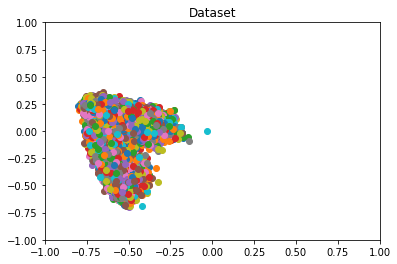

In [121]:
plt.plot()
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title('Dataset')
for i in range(len(X_in)):
    plt.scatter(X_in[i][0], X_in[i][1])
plt.show()

## Clustering: Kmeans Elbow

In [123]:
X_in = X_svd

In [124]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

In [131]:
# k means determine k
distortions = []
K = [2, 25, 250]  

max_iter = 300
number_of_seeds_to_try = 10
number_of_process = 2

k_labels = {}
k_center = {}

for k in K:
    model = KMeans(n_clusters=k, max_iter=300, n_init=number_of_seeds_to_try, n_jobs=number_of_process).fit(X_in)
    labels = model.labels_
    k_labels[k] = labels
    k_center[k] = model.cluster_centers_
    distortion = sum(np.min(cdist(X_in, model.cluster_centers_, 'euclidean'), axis=1)) / X_in.shape[0]
    distortions.append(distortion)
    print("k=", k, "distortion=", distortion, "labels=", k_labels[k][0:400])

k= 2 distortion= 0.6594682196836492 labels= [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
k= 25 distortion= 0.5435531522932562 labels= [22 22 22 22 22 22 22 22  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  

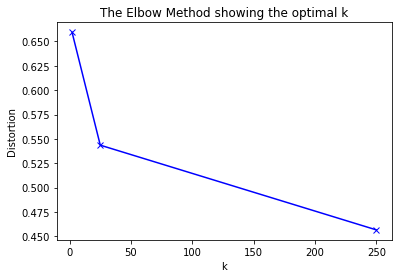

In [133]:
# Plot the elbow
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Minimize the length effect

In [134]:
X_in = interview

In [144]:
k_choice = 250
labels = k_labels[k_choice]
centroids = k_center[k_choice]

In [149]:
labels[0]

6

In [145]:
len(centroids)

250

In [154]:
interview_new = []

for i in range(len(interview)):
    label = labels[i]
    centroid = centroids[label]
    interview_new += [centroid]

In [162]:
interview_new[2] - interview_new[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# References

In [ ]:
# https://datascience.stackexchange.com/questions/23969/sentence-similarity-prediction
# https://towardsdatascience.com/singular-value-decomposition-example-in-python-dab2507d85a0
# https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/
# https://medium.com/@b.terryjack/nlp-everything-about-word-embeddings-9ea21f51ccfe

# Q&A

1. Verify that text length information is indeed contained in the vectors

Yes, the more the same word is repeated, the more the representation girates.


2. Come up with a way to transform the vectors to eliminate this length effect as much as possible without removing other information from the vectors (or at least minimizing damage to other information in the vectors). 

The clustering options above provide choice to minimize the length effect. It comes with a tradeoff, the more the length effect is reduced, the less distinctive is the representation of different sentences.

3. Theorize as to why this length information got into the vectors. Could a bug have been introduced in the BERT process that created these vectors? If so, what might that bug have been? This may be challenging. If you can't figure it out, show your work, and you'll get credit for finding the right track toward the answer. 


In [ ]:
# scale: embeddings dimensions perhaps too close to 0
# truncation/casting: float32 representation is a 32 bit number, for greater precision use float64